In [95]:
import ast
import json

with open('/tmp/dask/Client-18149812-08ea-11ec-a638-b82a724fa3f7.json', 'r') as fd:
    #data = json.load(fd)
    rawdata = ast.literal_eval(fd.read())
    #print(json.dumps(j))

rawdata

{"('assign-8259125f29790de81ed09114785c26e3', 14)": {'worker': 'tcp://10.255.23.110:34977',
  'msg': {'status': 'OK',
   'nbytes': 311322221,
   'thread': 139926373091072,
   'type': b'\x80\x04\x95#\x00\x00\x00\x00\x00\x00\x00\x8c\x11pandas.core.frame\x94\x8c\tDataFrame\x94\x93\x94.',
   'typename': 'pandas.core.frame.DataFrame',
   'metadata': {},
   'add_task_time': 1630256206.522435,
   'startstops': ({'action': 'compute',
     'start': 1630256206.5233288,
     'stop': 1630256207.667316},)},
  'submit_ts': 1630256206.320602},
 "('assign-8259125f29790de81ed09114785c26e3', 6)": {'worker': 'tcp://10.255.23.109:43995',
  'msg': {'status': 'OK',
   'nbytes': 315756913,
   'thread': 140168217458432,
   'type': b'\x80\x04\x95#\x00\x00\x00\x00\x00\x00\x00\x8c\x11pandas.core.frame\x94\x8c\tDataFrame\x94\x93\x94.',
   'typename': 'pandas.core.frame.DataFrame',
   'metadata': {},
   'add_task_time': 1630256206.527728,
   'startstops': ({'action': 'compute',
     'start': 1630256206.5312676,
  

In [99]:
import sys 
import pandas as pd

data = []
for i, t in enumerate(rawdata):
    startstops = rawdata[t]['msg']['startstops']
    submit_ts = rawdata[t]['submit_ts']
    worker_submit_ts = rawdata[t]['msg']['add_task_time']
    min_start = sys.maxsize
    max_end = 0
    
    for sts in startstops:
        if float(sts['start']) < min_start:
            min_start = float(sts['start'])
        if float(sts['stop']) > max_end:
            max_end = float(sts['stop'])
    data.append({'index': i, 'task': t, 'start': min_start, 
                 'submit': submit_ts, 'stop': max_end, 'worker_submit': worker_submit_ts})
    
df = pd.DataFrame(data)
df

,index,task,start,submit,stop,worker_submit
0,0,"('assign-8259125f29790de81ed09114785c26e3', 14)",1.630256e+09,1.630256e+09,1.630256e+09,1.630256e+09
1,1,"('assign-8259125f29790de81ed09114785c26e3', 6)",1.630256e+09,1.630256e+09,1.630256e+09,1.630256e+09
2,2,"('assign-8259125f29790de81ed09114785c26e3', 0)",1.630256e+09,1.630256e+09,1.630256e+09,1.630256e+09
3,3,"('assign-8259125f29790de81ed09114785c26e3', 18)",1.630256e+09,1.630256e+09,1.630256e+09,1.630256e+09
4,4,"('assign-8259125f29790de81ed09114785c26e3', 15)",1.630256e+09,1.630256e+09,1.630256e+09,1.630256e+09
5,5,"('assign-8259125f29790de81ed09114785c26e3', 7)",1.630256e+09,1.630256e+09,1.630256e+09,1.630256e+09
6,6,"('assign-8259125f29790de81ed09114785c26e3', 1)",1.630256e+09,1.630256e+09,1.630256e+09,1.630256e+09
7,7,('aggregate-chunk-18221b0ec561af51481ae3a184a7...,1.630256e+09,1.630256e+09,1.630256e+09,1.630256e+09
8,8,('aggregate-chunk-18221b0ec561af51481ae3a184a7...,1.630256e+09,1.630256e+09,1.630256e+09,1.630256e+09
9,9,('aggregate-chunk-18221b0ec561af51481ae3a184a7...,1.630256e+09,1.630256e+09,1.630256e+09,1.630256e+09


In [100]:
the_min = min(df['start'].min(), df['submit'].min())
df['tstart'] = df['start'] - the_min
df['tsubmit'] = df['submit'] - the_min
df['tstop'] = df['stop'] - the_min
df['twsubmit'] = df['worker_submit'] - the_min

df

,index,task,start,submit,stop,worker_submit,tstart,tsubmit,tstop,twsubmit
0,0,"('assign-8259125f29790de81ed09114785c26e3', 14)",1.630256e+09,1.630256e+09,1.630256e+09,1.630256e+09,0.203566,0.000839,1.347553,0.202672
1,1,"('assign-8259125f29790de81ed09114785c26e3', 6)",1.630256e+09,1.630256e+09,1.630256e+09,1.630256e+09,0.211505,0.000385,1.348259,0.207965
2,2,"('assign-8259125f29790de81ed09114785c26e3', 0)",1.630256e+09,1.630256e+09,1.630256e+09,1.630256e+09,0.199835,0.000000,1.342836,0.198138
3,3,"('assign-8259125f29790de81ed09114785c26e3', 18)",1.630256e+09,1.630256e+09,1.630256e+09,1.630256e+09,0.275658,0.001140,1.550569,0.272063
4,4,"('assign-8259125f29790de81ed09114785c26e3', 15)",1.630256e+09,1.630256e+09,1.630256e+09,1.630256e+09,1.354955,0.000894,2.438693,0.202823
5,5,"('assign-8259125f29790de81ed09114785c26e3', 7)",1.630256e+09,1.630256e+09,1.630256e+09,1.630256e+09,1.355705,0.000436,2.439953,0.208011
6,6,"('assign-8259125f29790de81ed09114785c26e3', 1)",1.630256e+09,1.630256e+09,1.630256e+09,1.630256e+09,1.372700,0.000110,2.461871,0.198183
7,7,('aggregate-chunk-18221b0ec561af51481ae3a184a7...,1.630256e+09,1.630256e+09,1.630256e+09,1.630256e+09,2.439005,1.357072,2.519160,1.357880
8,8,('aggregate-chunk-18221b0ec561af51481ae3a184a7...,1.630256e+09,1.630256e+09,1.630256e+09,1.630256e+09,2.446502,1.355543,2.527471,1.359390
9,9,('aggregate-chunk-18221b0ec561af51481ae3a184a7...,1.630256e+09,1.630256e+09,1.630256e+09,1.630256e+09,2.460700,1.373043,2.544652,1.373967


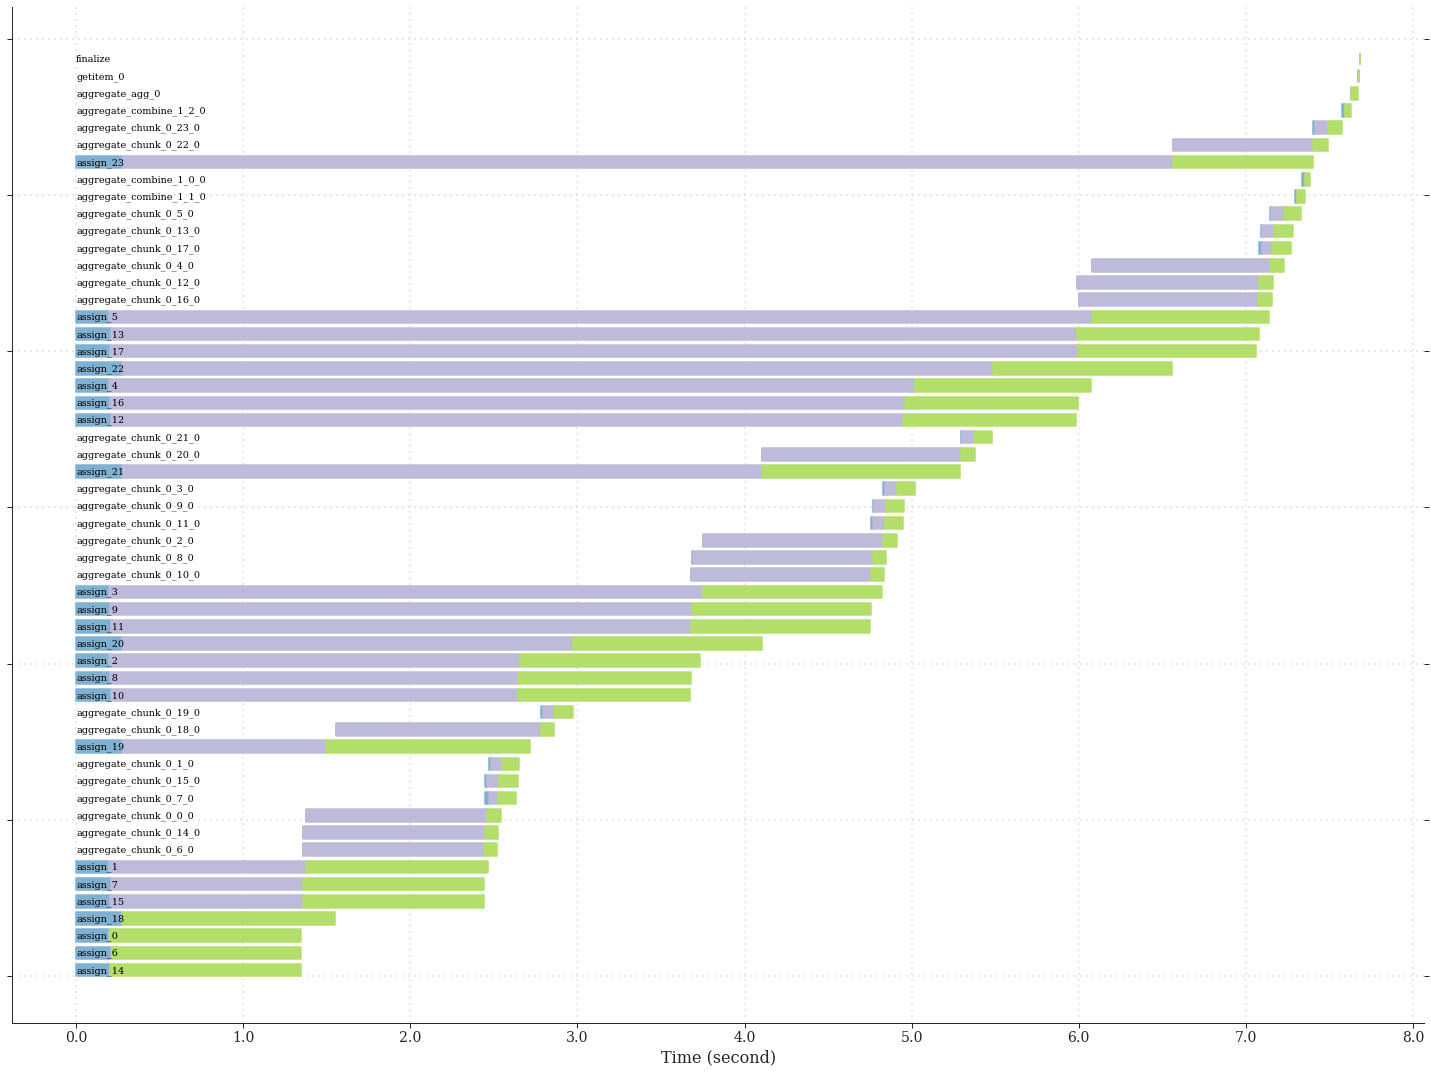

In [102]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
import pandas as pd
import os
import json
import itertools
import matplotlib
import matplotlib.ticker as ticker
import pandas as pd


#df.plot.scatter(x = 'tstart', y='index')
#df.plot.scatter(x = 'tsubmit', y='index')
#df.plot.scatter(x = 'tstop', y='index')

def get_name_of_key(key):
    _vname = ''
    try:
        names = ast.literal_eval(key)
        _vname = names[0].rsplit('-', 1)[0].replace('-', '_')\
        + '_' + '_'.join([str(n) for n in names[1:]])

    except (ValueError, SyntaxError) as e:
        _vname = key.rsplit('-')[0]
    return _vname



def format_xticks(x, pos=None):
    return x


def gantt_plot(df):
    sns.set_style("ticks")
    sns.set_context("paper", font_scale=1)
    sns.set_context(rc = {'patch.linewidth': 1.5, 'patch.color': 'black'})

    plt.rc('font', family='serif')

    fig, ax = plt.subplots(figsize=(20,15))
    ax.set_xlabel('Time (second)', fontsize=16)

    sns.despine()
    ax.yaxis.grid(color='#99999910', linestyle=(0, (5, 10)), linewidth=0.4)
    ax.xaxis.grid(color='#99999910', linestyle=(0, (5, 10)), linewidth=0.4)

    ax.set_axisbelow(True)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_xticks))
    ax.set_yticklabels([])
 
    # Setting graph attribute
    ax.grid(True)
    base = 0
    size = 8
    margin = 3
    
    for index, row in df.iterrows():
        ax.broken_barh([(row['tsubmit'], row['twsubmit'] - row['tsubmit'])], (base, size),
               edgecolors ='#80b1d3', facecolors = '#80b1d3')
        ax.broken_barh([(row['twsubmit'], row['tstart'] - row['twsubmit'])], (base, size),
               edgecolors ='#bebada', facecolors = '#bebada')
        ax.broken_barh([(row['tstart'], row['tstop'] - row['tstart'])], (base, size),
           edgecolors ='#b3de69', facecolors = '#b3de69')    
        
        ax.text(#x=ts['execute']['start'] + (ts['execute']['duration'])/2, 
                x=0,
                y=base + size/2,
                s=get_name_of_key(row['task']),
                ha='left', 
                va='center',
                color='black')
        
        base += (size + margin)
    
    ax.set_ylabel(f'{app}', fontsize=14)
    ax.set_title(f'{app}, {policy}, {virt_node}', fontsize=16)
    
    
    plotdir = './'
    plt.tight_layout()
    fig.savefig(f'{os.path.join(plotdir, "plots")}.gannt.png', 
                format='png', dpi=200)
    plt.show()

gantt_plot(df)